In [7]:
from glob import glob 
import pandas as pd 
from scipy.stats import linregress
import seaborn as sns 
import numpy as np 

sns.set_style('darkgrid')

humans = []
models = []

for f in glob('/home/work/yuna/HPA/results/vqa/*/*.jsonl'): 
    df = pd.read_json(f, lines=True)
    df['cat'] = f.split('/')[-2] # Human or Model type names 
    if 'subj' in df.columns: # Human data 
        humans.append(df) 
    else: 
        if 'model' not in df.columns: 
            df['model'] = f.split('/')[-1].split('.jsonl')[-1]
        models.append(df) 
    # print(f)
    

In [12]:
humans[0].groupby(['subj', 'question_type']).nunique().sort_values(by=['qid'])

qid  question  raw_output  processed_output  acc  \
subj question_type                                                           
성민석  is the person          1         1           1                 2    2   
     has                    2         2           1                 2    2   
     was                    2         2           1                 2    1   
     what time              2         2           1                 2    1   
     is he                  3         3           2                 3    4   
     is it                  3         3           3                 4    2   
     what are the           3         3           3                 4    2   
     how many people are    3         3           3                 4    1   
     what sport is          3         3           2                 3    1   
     what kind of           3         3           3                 4    2   
     what is the man        3         3           3                 4    2   
     which                  3         3           3                 4    2   
     do you                 4         4           1                 2    2   
     is the man             4         4           3                 4    3   
     is that a              4         4           1                 2    1   
     are the                4         4           3                 4    2   
     what is                4         4           4                 5    1   
     can you                4         4           3                 4    3   
     do                     5         5           3                 4    2   
     are they               5         5           1                 2    2   
     what is in the         5         5           1                 2    1   
     why                    5         5           1                 2    1   
     who is                 5         5           1                 2    2   
     what type of           5         5           2                 3    2   
     what color are the     5         5           1                 2    1   
     what color is          5         5           1                 2    1   
     none of the above      5         5           4                 5    2   
     are there              5         5           2                 3    2   
     does this              5         5           2                 3    2   
     could                  5         5           3                 4    2   
     are there any          5         5           3                 4    2   
     what color             6         6           1                 2    1   
     is                     6         6           4                 5    2   
     is there a             6         6           4                 5    2   
     what are               6         6           1                 2    1   
     are these              6         6           4                 5    2   
     what is on the         6         6           3                 4    2   
     where is the           6         6           1                 2    1   
     does the               7         7           3                 4    3   
     are                    7         7           2                 3    2   
     what is the            7         7           7                 8    2   
     is there               7         7           3                 3    2   
     how many               8         8           7                 8    2   
     what                  10        10           7                 8    1   
     what color is the     10        10          10                11    2   
     is this a             12        12           4                 5    3   
     is this               15        15           4                 5    4   
     is the                25        25           6                 6    3   

                          score  cat  
subj question_type                    
성민석  is the person            2    1  
     has

In [ ]:

humans = pd.concat(humans)
models = pd.concat(models)
humans['score'] = humans['score'] *100  
models['score'] = models['score'] *100  

# len(md.qid.unique()) # 1164 ### !!! MODEL QUESTIONS ARE NOT FILTERED 
md = models.groupby(['model', 'question_type', 'qid', 'cat']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index() ### TODO: ANSWER TYPE IS MISSING IN THE KEYS 
md.groupby(['model', 'cat']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index()

In [2]:
hm = humans.groupby(['subj', 'question_type', 'qid']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index()
hm['cat'] = 'humans'
hm.groupby(['subj']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index() 

,subj,acc,score
0,2025-09-30 11:18:51.944000,1.728395,24.103806
1,2025-09-29 09:07:33.096000,7.222222,27.310642
2,주연,7.160494,28.303796
3,HJp,9.259259,31.070740
4,BJH,13.888889,33.356643
5,2025-09-29 08:23:54.109000,12.654321,33.543240
6,2025-09-30 00:22:45.913000,10.987654,33.873978
7,2025-09-30 17:23:56.895000,11.604938,34.087951
8,Park,11.543210,34.221383
9,이성희,11.234568,34.279138


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import numpy as np

sns.set_theme(context="paper", style="whitegrid", font="DejaVu Serif", palette="muted")
plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 8,
    "axes.labelsize": 7,
    "legend.fontsize": 6,
    "figure.dpi": 300,
    "axes.linewidth": 0.8
})

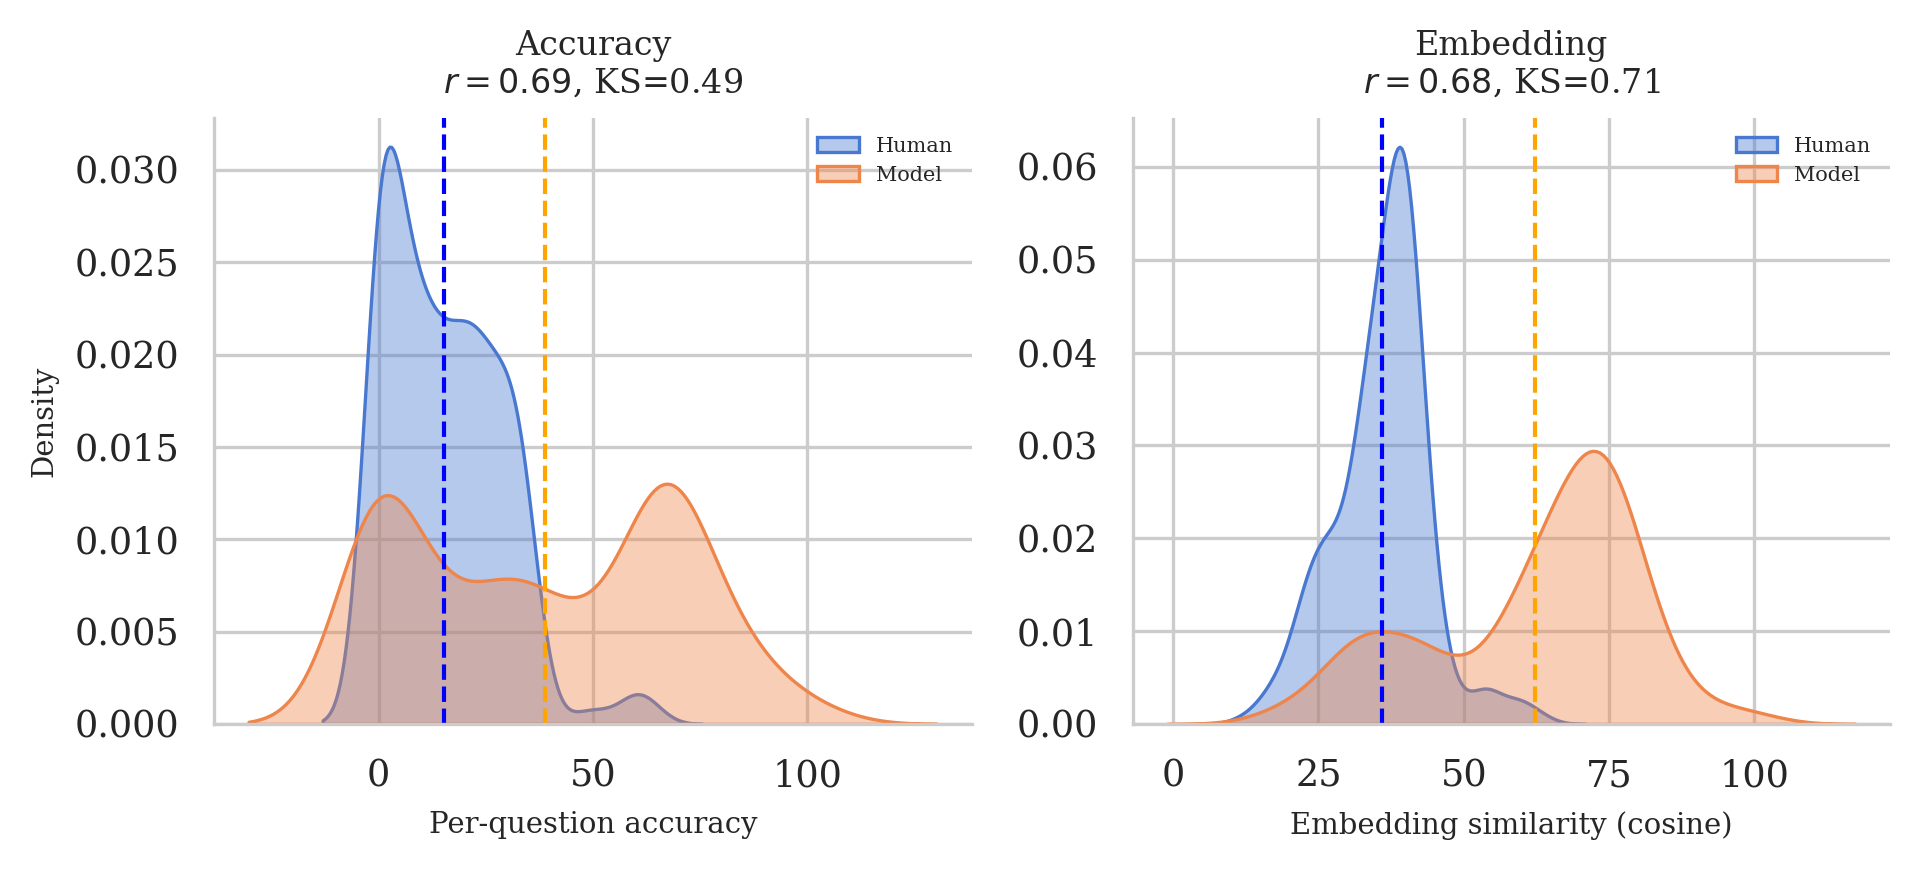

In [21]:
acc_corr = np.corrcoef(results['acc_human'], results['acc_model'])[0,1]
acc_ks = ks_2samp(results['acc_human'], results['acc_model'])
emb_corr = np.corrcoef(results['score_human'], results['score_model'])[0,1]
emb_ks = ks_2samp(results['score_human'], results['score_model'])

fig, axes = plt.subplots(1, 2, figsize=(6.5, 3))
# --- Accuracy plot ---
sns.kdeplot(results['acc_human'], fill=True, alpha=0.4, label="Human", ax=axes[0])
sns.kdeplot(results['acc_model'], fill=True, alpha=0.4, label="Model", ax=axes[0])
axes[0].axvline(results['acc_human'].mean(), color='blue', ls='--', lw=1)
axes[0].axvline(results['acc_model'].mean(), color='orange', ls='--', lw=1)
axes[0].set_xlabel("Per-question accuracy")
axes[0].set_ylabel("Density")
axes[0].set_title(f"Accuracy\n$r={acc_corr:.2f}$, KS={acc_ks.statistic:.2f}")
axes[0].legend(frameon=False)

# --- Embedding plot ---
sns.kdeplot(results['score_human'], fill=True, alpha=0.4, label="Human", ax=axes[1])
sns.kdeplot(results['score_model'], fill=True, alpha=0.4, label="Model", ax=axes[1])
axes[1].axvline(results['score_human'].mean(), color='blue', ls='--', lw=1)
axes[1].axvline(results['score_model'].mean(), color='orange', ls='--', lw=1)
axes[1].set_xlabel("Embedding similarity (cosine)")
axes[1].set_ylabel("")
axes[1].set_title(f"Embedding\n$r={emb_corr:.2f}$, KS={emb_ks.statistic:.2f}")
axes[1].legend(frameon=False)

sns.despine()
plt.tight_layout()
plt.savefig("./plots/distribution_comparison.pdf", bbox_inches='tight')
plt.show()

In [4]:
results = pd.merge(
    hm.groupby(['qid', 'question_type']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index(),  
    md.groupby(['qid', 'question_type']).agg({'acc': 'mean', 'score': 'mean'}).sort_values(by=['score']).reset_index(), 
    on=['question_type', 'qid'], 
    suffixes=('_human', '_model'))

mmg = pd.merge(hm, md, on=['qid', 'question_type'], how='inner', suffixes=['_human', '_model'])   # , TODO 'answer_type'  is missing 
mmg 

,subj,question_type,qid,acc_human,score_human,cat_human,model,cat_model,acc_model,score_model
0,Cm,what,527038002,0.0,7.112764,humans,Qwen2.5-0.5B-Instruct,LLM,0.0,-3.108833
1,Cm,what,527038002,0.0,7.112764,humans,gemma-3-12b-it,VLM,0.0,11.813132
2,Cm,what,527038002,0.0,7.112764,humans,llava-v1.6-mistral-7b-hf,VLM,0.0,13.236828
3,Cm,what,527038002,0.0,7.112764,humans,TinyLLaVA-Phi-2-SigLIP-3.1B,VLM,0.0,13.236828
4,Cm,what,527038002,0.0,7.112764,humans,llava-1.5-7b-hf,VLM,0.0,13.236828
...,...,...,...,...,...,...,...,...,...,...
58515,Park,how many people are,349437002,100.0,100.000024,humans,GPT5,VLM,100.0,100.000024
58516,Park,how many people are,349437002,100.0,100.000024,humans,gemini2_5,VLM,100.0,100.000024
58517,이성희,how many people are,349437002,100.0,100.000024,humans,gemini,VLM,0.0,34.825182
58518,이성희,how many people are,349437002,100.0,100.000024,humans,GPT5,VLM,100.0,100.000024


In [6]:
mmg.groupby(['model', 'subj', 'question_type']).count()

qid  \
model                    subj                       question_type        
                         2025-09-29 08:23:54.109000 are              4   
                                                    are the          2   
                                                    are there        3   
                                                    are there any    4   
                                                    are these        2   
...                                                                ...   
llava-v1.6-mistral-7b-hf 주연                         what type of     3   
                                                    where is the     3   
                                                    which            2   
                                                    who is           1   
                                                    why              4   

                                                                   acc_human  \
model                    subj                       question_type              
                         2025-09-29 08:23:54.109000 are                    4   
                                                    are the                2   
                                                    are there              3   
                                                    are there any          4   
                                                    are these              2   
...                                                                      ...   
llava-v1.6-mistral-7b-hf 주연                         what type of           3   
                                                    where is the           3   
                                                    which                  2   
                                                    who is                 1   
                                                    why                    4   

                                                                   score_human  \
model                    subj                       question_type                
                         2025-09-29 08:23:54.109000 are                      4   
                                                    are the                  2   
                                                    are there                3   
                                                    are there any            4   
                                                    are these                2   
...                                                                        ...   
llava-v1.6-mistral-7b-hf 주연                         what type of             3   
                                                    where is the             3   
                                                    which                    2   
                                                    who is                   1   
                                                    why                      4   

                                                                   cat_human  \
model                    subj                       question_type              
                         2025-09-29 08:23:54.109000 are                    4   
                                                    are the                2   
                                                    are there              3   
                                                    are there any          4   
                                                    are these              2   
...                                                                      ...   
llava-v1.6-mistral-7b-hf 주연                         what type of           3   
                                                    where is the           3   
                                                    which                  2   
                                                    who is                 1   
                                    

In [35]:
def get_correlation_by_model(mmg, model, score_col, grouping=['question_type'], save_prefix=''):  # 'subj', 
    model_type = mmg.cat_model.unique()[0]
    grouped = mmg[mmg['model']== model].groupby(grouping).agg({f'{score_col}_human': 'mean', f'{score_col}_model': 'mean'}).reset_index() # 'qid', 
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=grouped, x=f'{score_col}_human', y=f'{score_col}_model') # grouped[grouped['answer_type']!='other']  # , hue='answer_type' 
    sns.regplot(data=grouped, x=f'{score_col}_human', y=f'{score_col}_model', scatter=False, color='black')  # best-fit line
    plt.title(f'{model} {score_col}')
    plt.savefig(f"./plots/{model.split('/')[-1]}_{score_col}{save_prefix}.png", dpi=300, bbox_inches='tight') 
    # plt.show()
    plt.close()  # Add this line
    print(f"saved in ./plots/{model.split('/')[-1]}_{score_col}{save_prefix}.png")
    
    x = grouped[f'{score_col}_human']
    y = grouped[f'{score_col}_model'] 
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f"y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")
    
    score_human = np.mean(grouped[f'{score_col}_human'])
    score_model = np.mean(grouped[f'{score_col}_model'])

    return {
        "model": model.split('/')[-1], 
        "model_type": model_type, 
        "slope": slope, 
        "intercept": intercept, 
        "r_value": r_value, 
        "p_value": p_value, 
        "std_err": std_err, 
        # "outliers": outliers,  # ITS A DF 
        "model_avg": score_model,
        "human_avg": score_human, 
        "eval_metric": score_col
    } 


saved in ./plots/Qwen2.5-0.5B-Instruct_score_qid.png
y = 1.135 * x + 14.445, R² = 0.091
saved in ./plots/gemma-3-12b-it_score_qid.png
y = 1.121 * x + 30.649, R² = 0.142
saved in ./plots/llava-v1.6-mistral-7b-hf_score_qid.png
y = 1.967 * x + 0.109, R² = 0.442
saved in ./plots/TinyLLaVA-Phi-2-SigLIP-3.1B_score_qid.png
y = 1.967 * x + 0.109, R² = 0.442
saved in ./plots/llava-1.5-7b-hf_score_qid.png
y = 1.967 * x + 0.109, R² = 0.442
saved in ./plots/llava-1.5-13b-hf_score_qid.png
y = 1.967 * x + 0.109, R² = 0.442
saved in ./plots/internlm2_5-7b-chat_score_qid.png
y = 0.087 * x + 25.928, R² = 0.002
saved in ./plots/instructblip-vicuna-7b_score_qid.png
y = 2.077 * x + -2.923, R² = 0.509
saved in ./plots/GPT5_score_qid.png
y = 1.810 * x + 9.570, R² = 0.385
saved in ./plots/Qwen2.5-7B-Instruct_score_qid.png
y = 1.539 * x + 12.587, R² = 0.217
saved in ./plots/_score_qid.png
y = 1.820 * x + 6.713, R² = 0.522
saved in ./plots/gemini_score_qid.png
y = 0.480 * x + 16.252, R² = 0.090
saved in ./plot

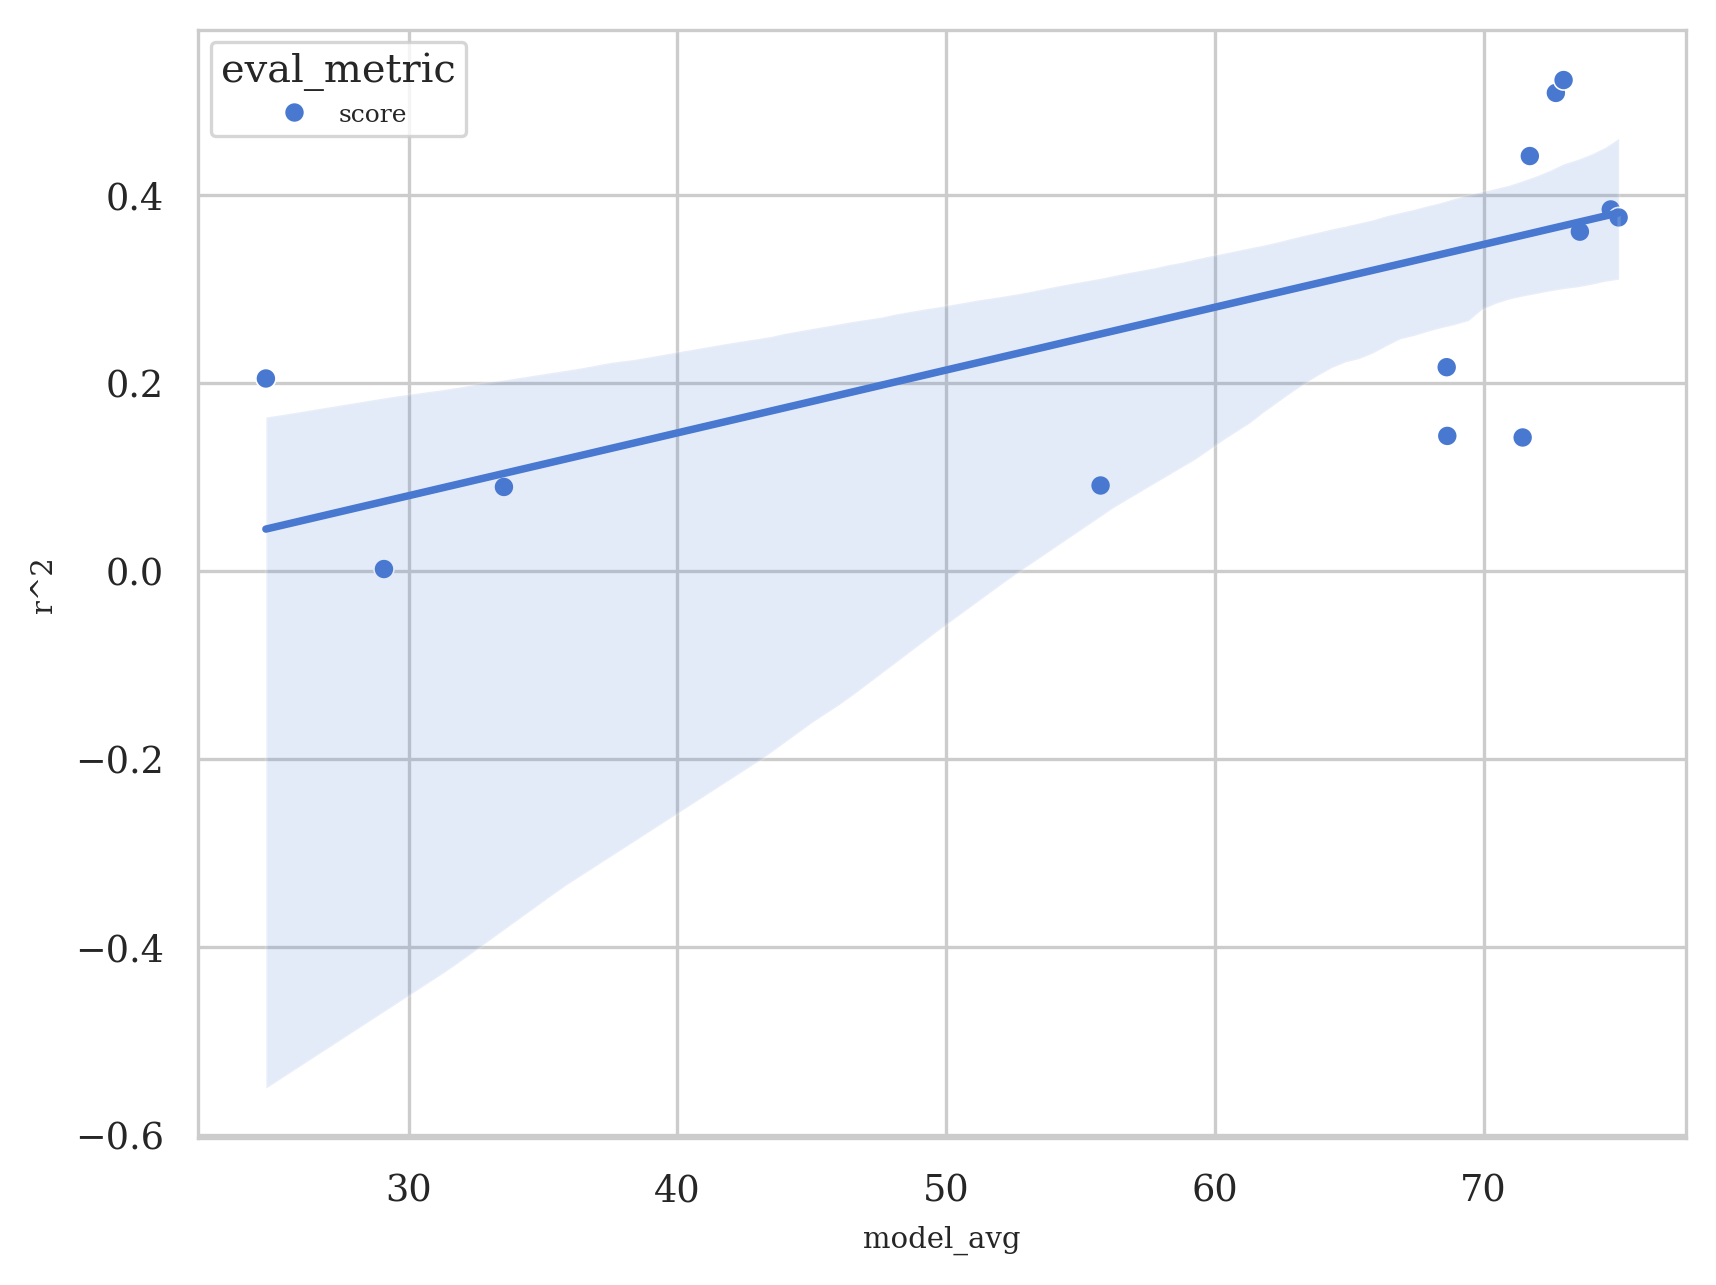

In [38]:
corr = [] 
for metric in ['score'] :  # 'acc', 
    for model in mmg.model.unique(): 
        corr.append(get_correlation_by_model(mmg, model, metric, ['question_type', 'qid'], '_qid'))
corr = pd.DataFrame(corr)
corr['r^2'] = corr['r_value'] ** 2 
x = corr['model_avg']
y = corr['r^2']
sns.scatterplot(corr, y='r^2', x='model_avg', hue="eval_metric")
slope, intercept, r_value, p_value, std_err = linregress(x, y)
sns.regplot(data=corr, x='model_avg', y='r^2', scatter=False, label='score fit')
# print(f"SCORE y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")
corr.to_csv(f'./csv/model_vs_human_{metric}_correlation_by_qid.csv') 

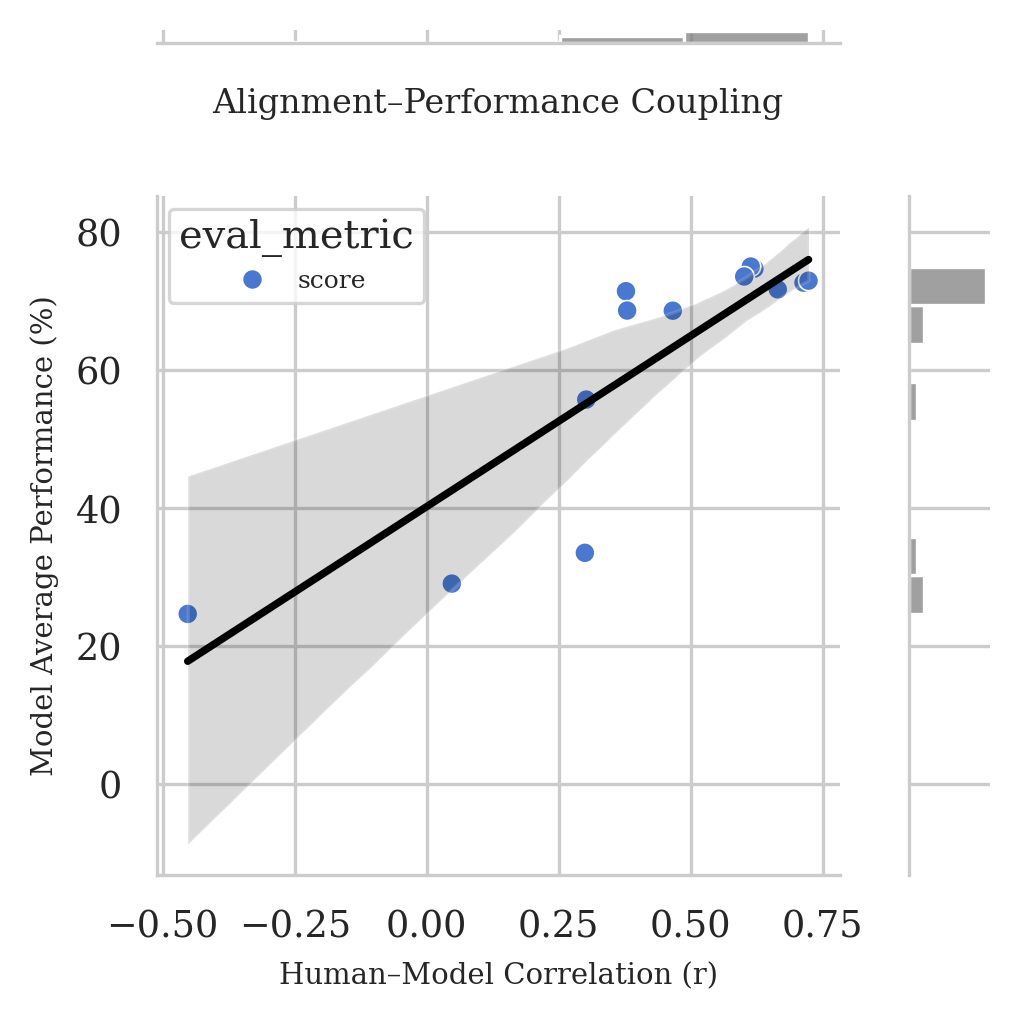

In [39]:
g = sns.JointGrid(data=corr, x="r_value", y="model_avg", height=3.5)
sns.scatterplot(data=corr, x="r_value", y="model_avg", hue="eval_metric", ax=g.ax_joint)
sns.regplot(data=corr, x="r_value", y="model_avg", scatter=False, ax=g.ax_joint, color="black")
sns.histplot(data=corr, x="r_value", ax=g.ax_marg_x, color="gray")
sns.histplot(data=corr, y="model_avg", ax=g.ax_marg_y, color="gray")
g.ax_joint.set_xlabel("Human–Model Correlation (r)")
g.ax_joint.set_ylabel("Model Average Performance (%)")
g.ax_joint.set_title("Alignment–Performance Coupling", pad=20)
plt.tight_layout()
plt.show()

saved in ./plots/Qwen2.5-0.5B-Instruct_acc.png
y = 1.549 * x + 3.316, R² = 0.424
saved in ./plots/Qwen2.5-0.5B-Instruct_score.png
y = 1.657 * x + -4.610, R² = 0.318
saved in ./plots/gemma-3-12b-it_acc.png
y = 1.468 * x + 21.797, R² = 0.243
saved in ./plots/gemma-3-12b-it_score.png
y = 1.717 * x + 7.229, R² = 0.369
saved in ./plots/llava-v1.6-mistral-7b-hf_acc.png
y = 1.847 * x + 17.005, R² = 0.430
saved in ./plots/llava-v1.6-mistral-7b-hf_score.png
y = 2.259 * x + -13.088, R² = 0.603
saved in ./plots/TinyLLaVA-Phi-2-SigLIP-3.1B_acc.png
y = 1.847 * x + 17.005, R² = 0.430
saved in ./plots/TinyLLaVA-Phi-2-SigLIP-3.1B_score.png
y = 2.259 * x + -13.088, R² = 0.603
saved in ./plots/llava-1.5-7b-hf_acc.png
y = 1.847 * x + 17.005, R² = 0.430
saved in ./plots/llava-1.5-7b-hf_score.png
y = 2.259 * x + -13.088, R² = 0.603
saved in ./plots/llava-1.5-13b-hf_acc.png
y = 1.847 * x + 17.005, R² = 0.430
saved in ./plots/llava-1.5-13b-hf_score.png
y = 2.259 * x + -13.088, R² = 0.603
saved in ./plots/int

<Axes: xlabel='model_avg', ylabel='r^2'>

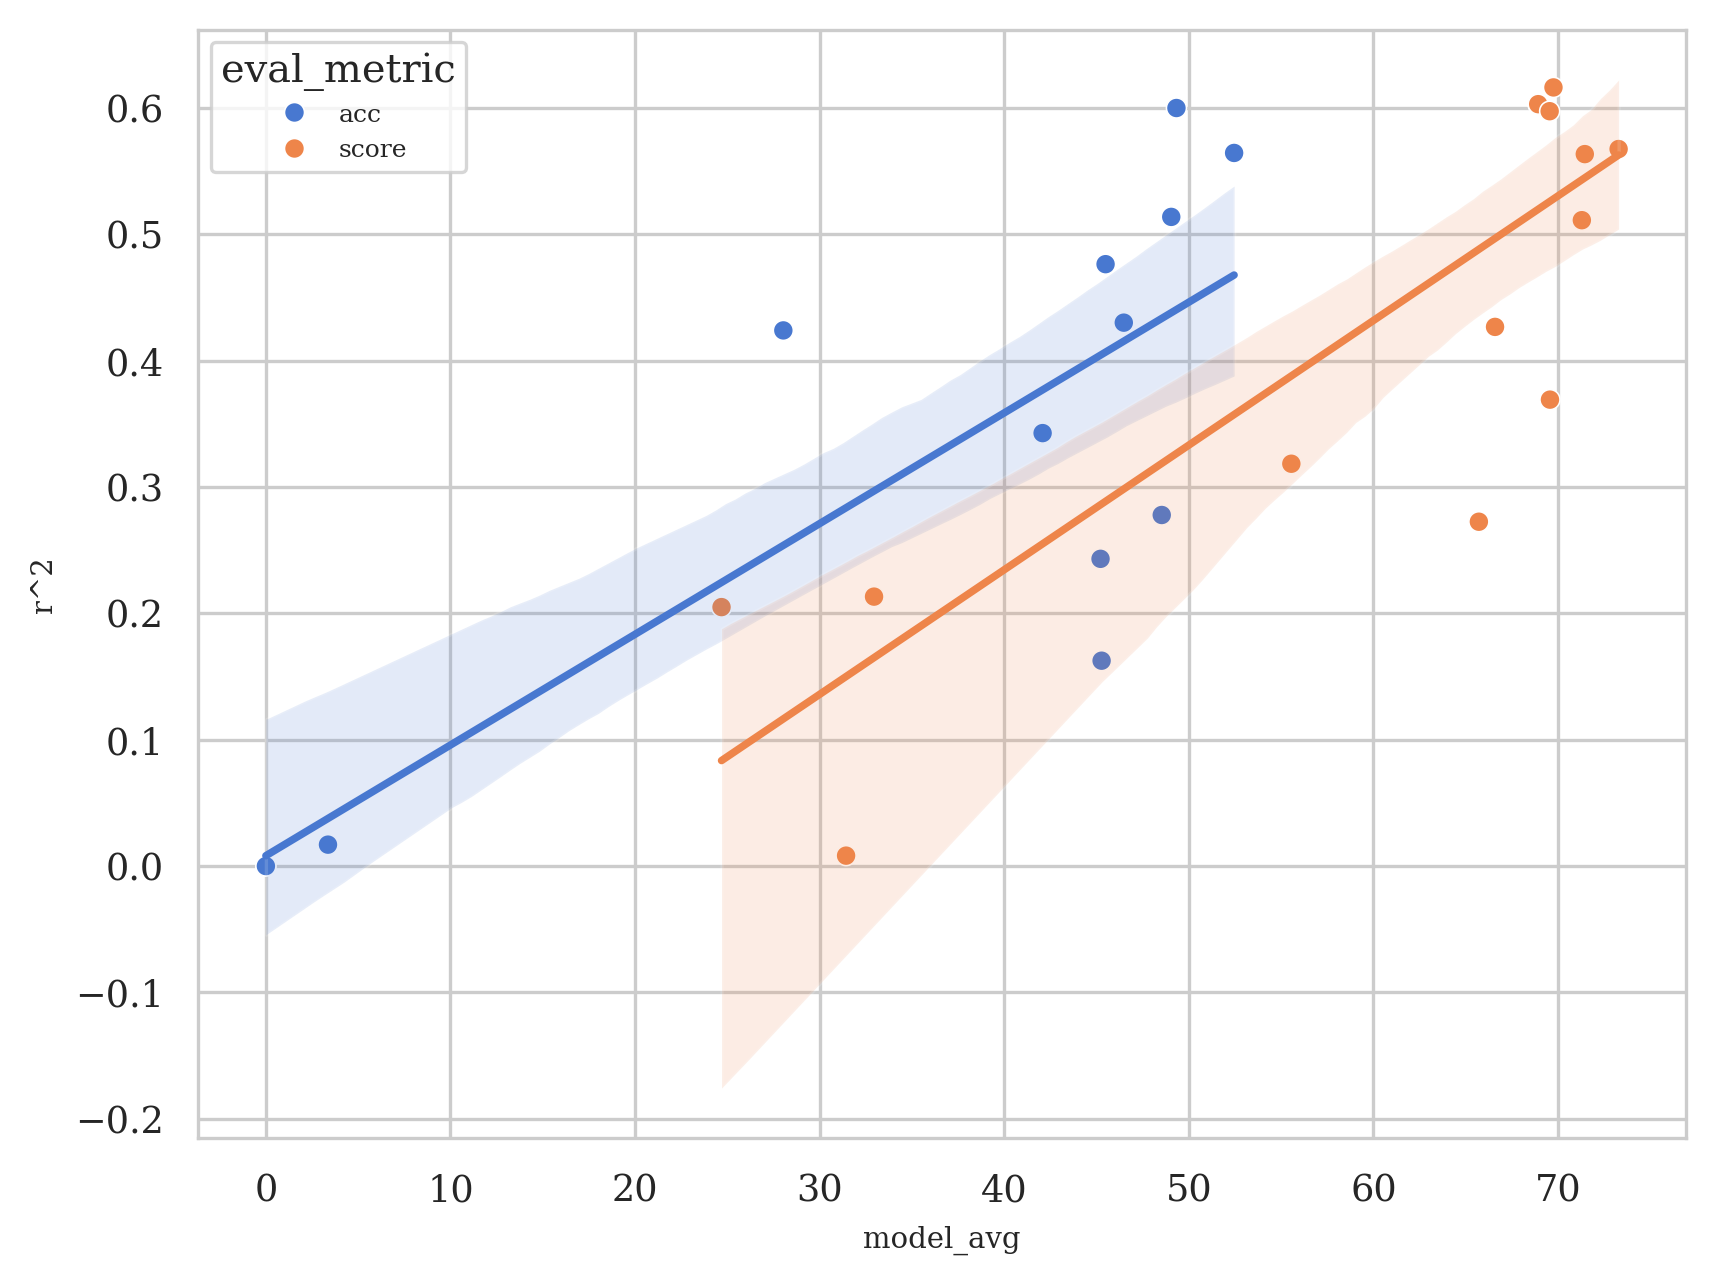

In [40]:
corr = []
for model in mmg.model.unique(): 
    corr.append(get_correlation_by_model(mmg, model, 'acc'))
    corr.append(get_correlation_by_model(mmg, model, 'score'))
corr = pd.DataFrame(corr)
corr['r^2'] = corr['r_value'] ** 2 

### DRAW CORRELATION GRAPH FOR ALL MODELS TO HUMANS CORRELATION VS PEROFMRNACE 
sns.scatterplot(corr, y='r^2', x='model_avg', hue="eval_metric")

x = corr[corr['eval_metric'] == 'acc']['model_avg']
y = corr[corr['eval_metric'] == 'acc']['r^2']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"ACC y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")
sns.regplot(data=corr[corr['eval_metric'] == 'acc'], x='model_avg', y='r^2', scatter=False, label='acc fit')

x = corr[corr['eval_metric'] == 'score']['model_avg']
y = corr[corr['eval_metric'] == 'score']['r^2']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print(f"SCORE y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")
sns.regplot(data=corr[corr['eval_metric'] == 'score'], x='model_avg', y='r^2', scatter=False, label='score fit')


In [ ]:
mg = mmg.groupby(['question_type', 'cat_human', 'cat_model']).agg({'score_human': 'mean', 'score_model': 'mean', 'acc_human': 'mean', 'acc_model': 'mean'}).reset_index() 

for model in mmg.model.unique(): 
    for subj in mmg.subj.unique():
        filtered_mmg = mmg[(mmg['model'] == model) & (mmg['subj'] == subj)] 
        # print(f"Model: {model}, Subject: {subj}, Rows: {len(filtered_mmg)}")
        

In [6]:
filtered_mmg

,subj,question_type,qid,acc_human,score_human,cat_human,model,cat_model,acc_model,score_model
21419,박지윤,what is,450709003,0.0,0.215026,humans,Qwen2.5-7B,LLM,0.0,0.391011
30353,박지윤,where is the,304044004,0.0,0.250390,humans,Qwen2.5-7B,LLM,0.0,0.278562
38970,박지윤,do,119802000,0.0,0.407764,humans,Qwen2.5-7B,LLM,0.0,0.240821
39847,박지윤,does the,503992002,0.0,0.429213,humans,Qwen2.5-7B,LLM,0.0,0.197769
39906,박지윤,is this,11241003,0.0,0.429213,humans,Qwen2.5-7B,LLM,0.0,0.223149
43511,박지윤,is the,502630003,50.0,0.504262,humans,Qwen2.5-7B,LLM,0.0,0.217352
47957,박지윤,does this,537701022,50.0,0.591559,humans,Qwen2.5-7B,LLM,0.0,0.237593
49090,박지윤,none of the above,301305003,50.0,0.609597,humans,Qwen2.5-7B,LLM,0.0,0.188404


y = 1.346 * x + 13.886, R² = 0.483


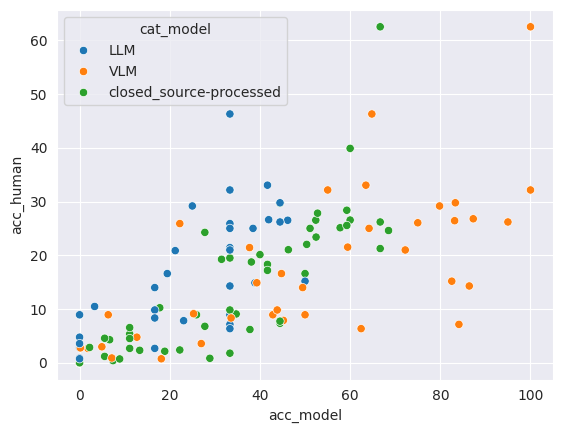

In [157]:
import seaborn as sns 
from scipy.stats import linregress

sns.set_style('darkgrid')
score_col = 'acc'
sns.scatterplot(data=mg, y=f'{score_col}_human', x=f'{score_col}_model', hue='cat_model')
slope, intercept, r_value, p_value, std_err = linregress(mg[f'{score_col}_human'], mg[f'{score_col}_model'])
print(f"y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")

y = 1.581 * x + 0.025, R² = 0.450


<Axes: xlabel='score_model', ylabel='score_human'>

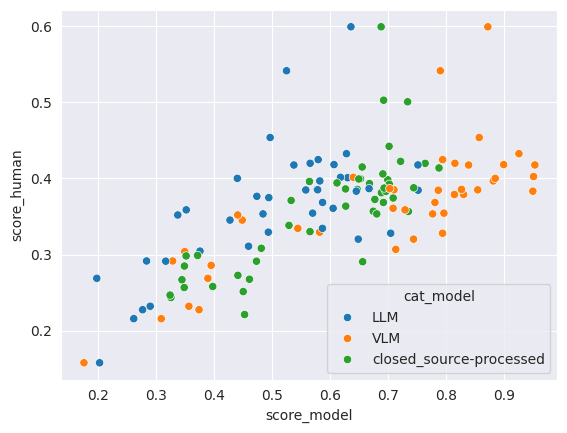

In [88]:
import seaborn as sns 

sns.set_style('darkgrid')
score_col = 'score'
slope, intercept, r_value, p_value, std_err = linregress(mg[f'{score_col}_human'], mg[f'{score_col}_model'])
print(f"y = {slope:.3f} * x + {intercept:.3f}, R² = {r_value**2:.3f}")
sns.scatterplot(data=mg, y='score_human', x='score_model', hue='cat_model')

In [ ]:
import numpy as np 

def get_correlation_by_model(df, model, score_col, save=True): 
    grouped = df.groupby(['question_id', 'question_type', 'answer_type']).agg({f'{score_col}_human': 'mean', f'{score_col}_model': 'mean'}).reset_index() # .dropna(axis=0)
    
    save= model if save else None 
    df_grouped, corr = plot_correlation(grouped, save=model+'_'+score_col, score_col=score_col) 
    score_human = np.mean(df_grouped[f'{score_col}_human'])
    score_model = np.mean(df_grouped[f'{score_col}_model'])

    slope, intercept, r_value, p_value, std_err, outliers = corr 
    return {
        "model": model, 
        "slope": slope, 
        "intercept": intercept, 
        "r_value": r_value, 
        "p_value": p_value, 
        "std_err": std_err, 
        # "outliers": outliers,  # ITS A DF 
        "model_avg": score_model,
        "human_avg": score_human, 
        "eval_metric": score_col
    } 

In [ ]:
correlations = []
for model in sc.model.unique() : 
    df = sc[sc['model'] == model ]
    # print(model, len(df))
    if not len(df): 
        continue 
    correlations.append(get_correlation_by_model(df, model, 'score', False))
    correlations.append(get_correlation_by_model(df, model, 'acc', False))
corr = pd.DataFrame(correlations)